<a href="https://colab.research.google.com/github/Eddythemachine/clustering_learning/blob/main/knn_clusteing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-MEANS Clustering

# IMPORT LIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATA

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
print(df.head(1))

   CustomerID Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1  Male   19                  15                      39


# SPLITING INTO X AND Y

In [4]:
X = df.iloc[:,[3,4]].values

# USING THE ELBOW MEHOD TO FIND THE OPTIMAL NUMBER OF CLUSTERS

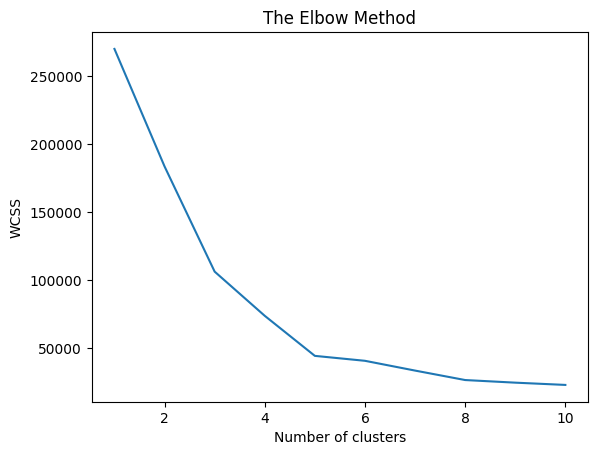

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11) :
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

plt.ylabel('WCSS')
plt.show()

# TRAINING THE K-MEANS MODEL ON DATAST

In [6]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

#  VISUALISING CLUSTERS

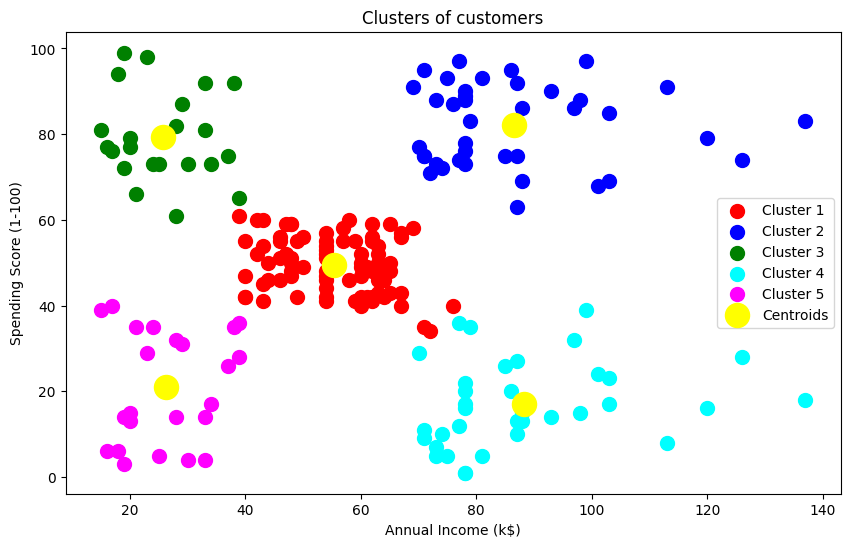

In [7]:
# Visualising the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()